#### This notebook contains a dataset about video games and their respective sales. The dataset contains 16598 entries. The variables are the following:

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.


In [46]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [80]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [81]:
df.columns = df.columns.str.lower()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
rank            16598 non-null int64
name            16598 non-null object
platform        16598 non-null object
year            16327 non-null float64
genre           16598 non-null object
publisher       16540 non-null object
na_sales        16598 non-null float64
eu_sales        16598 non-null float64
jp_sales        16598 non-null float64
other_sales     16598 non-null float64
global_sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [83]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [84]:
df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [85]:
df.dropna(inplace=True)

In [86]:
df['year'] = df['year'].astype(int)

In [87]:
df["platform"].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [88]:
df["genre"].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: genre, dtype: int64

In [89]:
df["publisher"].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
DreamWorks Interactive             1
DigiCube                           1
On Demand                          1
Otomate                            1
Phantagram                         1
Name: publisher, Length: 576, dtype: int64

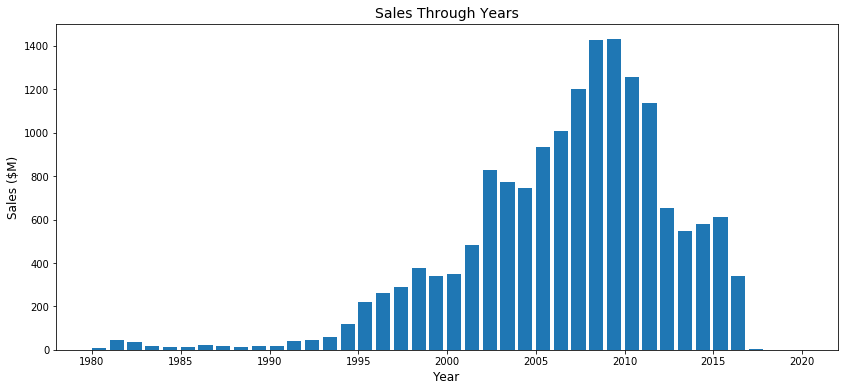

In [100]:
plt.figure(figsize=(14,6))
plt.hist(df['year'], bins = 40, width = 0.8)
plt.title('Sales Through Years', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sales ($M)', fontsize = 12)
plt.show()

## Analyzing variables


### Publisher

In [101]:
publisher = df.groupby('publisher').sum()
publisher = publisher.drop(columns = ['year', "rank"])
publisher = publisher.sort_values(by=['global_sales'], ascending=False).head(15)
publisher

,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Nintendo,815.75,418.30,454.99,95.19,1784.43
1,Electronic Arts,584.22,367.38,13.98,127.63,1093.39
2,Activision,426.01,213.72,6.54,74.79,721.41
3,Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
4,Ubisoft,252.81,163.03,7.33,50.16,473.54
5,Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
6,THQ,208.60,94.60,5.01,32.11,340.44
7,Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
8,Sega,108.78,81.41,56.19,24.30,270.70
9,Namco Bandai Games,69.38,42.61,126.84,14.64,253.65


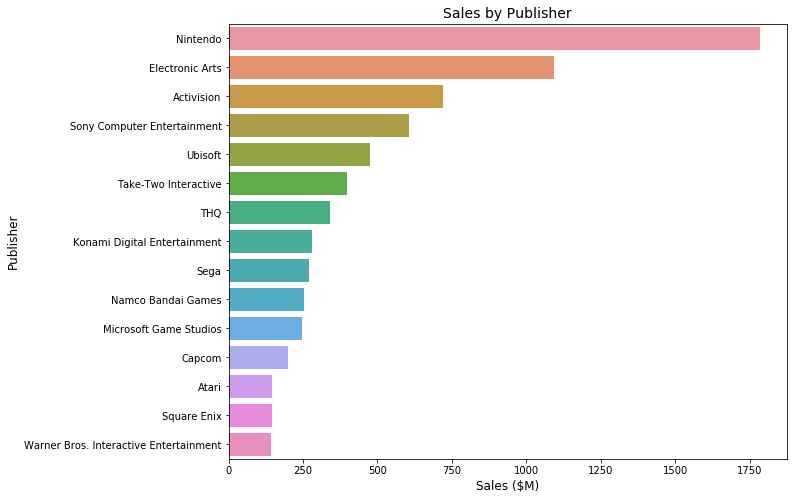

In [108]:
plt.figure(figsize=(10,8))
sns.barplot(x="global_sales", y="publisher", data=publisher)
plt.title('Sales by Publisher', fontsize = 14)
plt.xlabel('Sales ($M)', fontsize = 12)
plt.ylabel('Publisher', fontsize = 12)
plt.show()

### Game

In [113]:
game = df.groupby('name').sum()
game = game.drop(columns = ['year', "rank"])
game = game.sort_values(by=['global_sales'], ascending=False).reset_index(drop=False).head(15)
game

,name,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,41.49,29.02,3.77,8.46,82.74
1,Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
2,Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
3,Tetris,26.17,2.95,6.03,0.69,35.84
4,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
5,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
6,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
7,Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
8,New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01
9,Call of Duty: Black Ops II,14.08,11.05,0.72,3.88,29.72


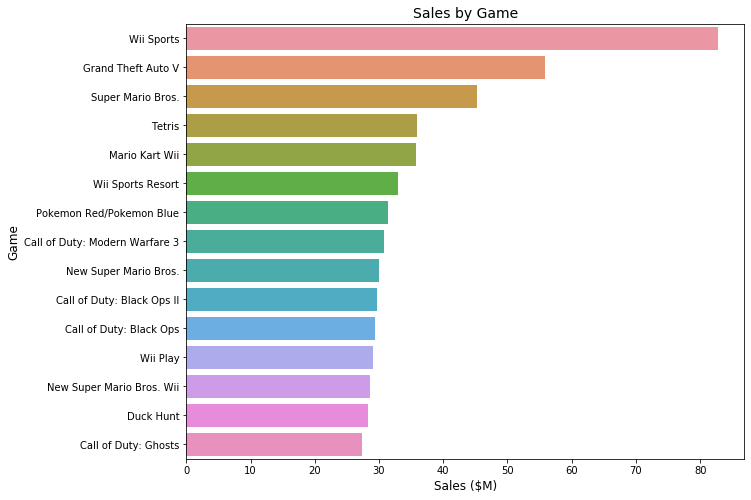

In [114]:
plt.figure(figsize=(10,8))
sns.barplot(x="global_sales", y="name", data=game)
plt.title('Sales by Game', fontsize = 14)
plt.xlabel('Sales ($M)', fontsize = 12)
plt.ylabel('Game', fontsize = 12)
plt.show()

### Platform

In [103]:
platform = df.groupby('platform').sum()
platform = platform.drop(columns = ['year', "rank"])
platform = platform.sort_values(by=['global_sales'], ascending=False).reset_index(drop=False).head(15)
platform

,platform,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,PS2,572.92,332.63,137.54,190.47,1233.46
1,X360,594.33,278.00,12.30,84.67,969.60
2,PS3,388.90,340.47,79.21,140.81,949.35
3,Wii,497.37,264.35,68.28,79.20,909.81
4,DS,388.53,194.05,175.02,60.29,818.91
5,PS,334.71,212.38,139.78,40.69,727.39
6,GBA,178.43,72.49,46.56,7.51,305.62
7,PSP,107.09,67.16,75.89,41.52,291.71
8,PS4,96.80,123.70,14.30,43.36,278.10
9,PC,92.04,137.35,0.17,24.33,254.70


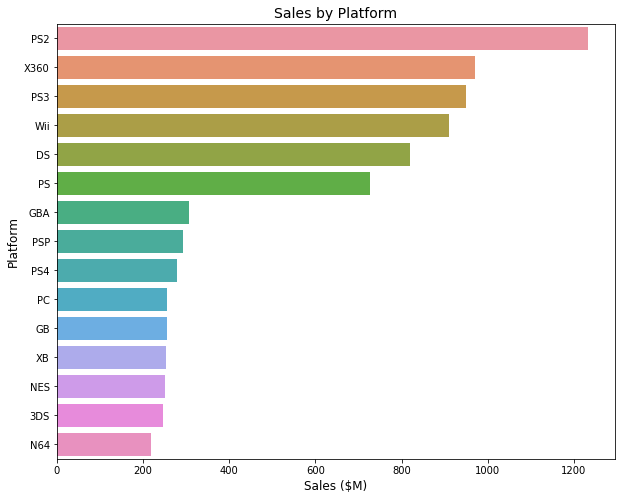

In [109]:
plt.figure(figsize=(10,8))
sns.barplot(x="global_sales", y="platform", data=platform)
plt.title('Sales by Platform', fontsize = 14)
plt.xlabel('Sales ($M)', fontsize = 12)
plt.ylabel('Platform', fontsize = 12)
plt.show()

### Genre

In [105]:
genre = df.groupby('genre').sum()
genre = genre.drop(columns = ['year', "rank"])
genre = genre.sort_values(by=['global_sales'], ascending=False).reset_index(drop=False)
genre

,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Action,861.77,516.48,158.65,184.92,1722.84
1,Sports,670.09,371.34,134.76,132.65,1309.24
2,Shooter,575.16,310.45,38.18,101.90,1026.20
3,Role-Playing,326.50,187.57,350.29,59.38,923.83
4,Platform,445.99,200.65,130.65,51.51,829.13
5,Misc,396.92,211.77,106.67,73.92,789.87
6,Racing,356.93,236.31,56.61,76.68,726.76
7,Fighting,220.74,100.00,87.15,36.19,444.05
8,Simulation,181.78,113.02,63.54,31.36,389.98
9,Puzzle,122.01,50.52,56.68,12.47,242.21


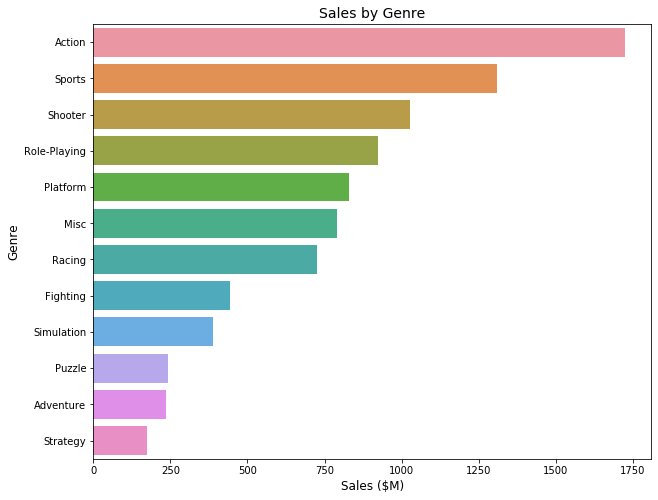

In [110]:
plt.figure(figsize=(10,8))
sns.barplot(x="global_sales", y="genre", data=genre)
plt.title('Sales by Genre', fontsize = 14)
plt.xlabel('Sales ($M)', fontsize = 12)
plt.ylabel('Genre', fontsize = 12)
plt.show()

### Regions

In [74]:
sales = df.groupby('year')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
sales.head()

,na_sales,eu_sales,jp_sales,other_sales
year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70


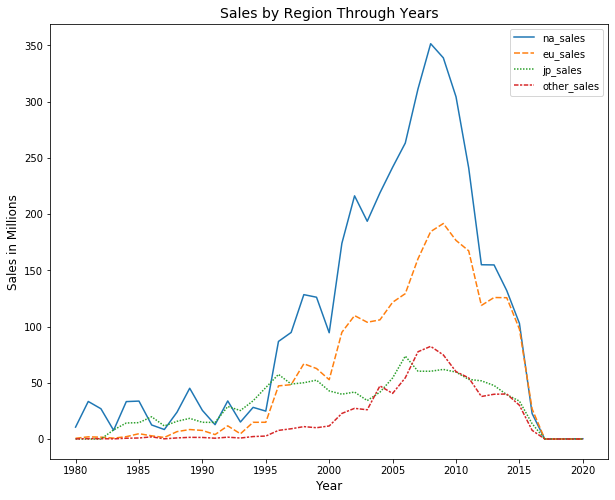

In [78]:
plt.figure(figsize=(10,8))
sns.lineplot(data = sales)
plt.title('Sales by Region Through Years', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sales in Millions', fontsize = 12)
plt.show()